In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from scipy.stats import f_oneway

## reading the data 

In [31]:
car_data = pd.read_csv('car data.csv')
car_data.head(7)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0


### Dealing with missing values

- checking for missing values

In [32]:
missing_values = car_data.isnull().sum()
missing_values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<Axes: >

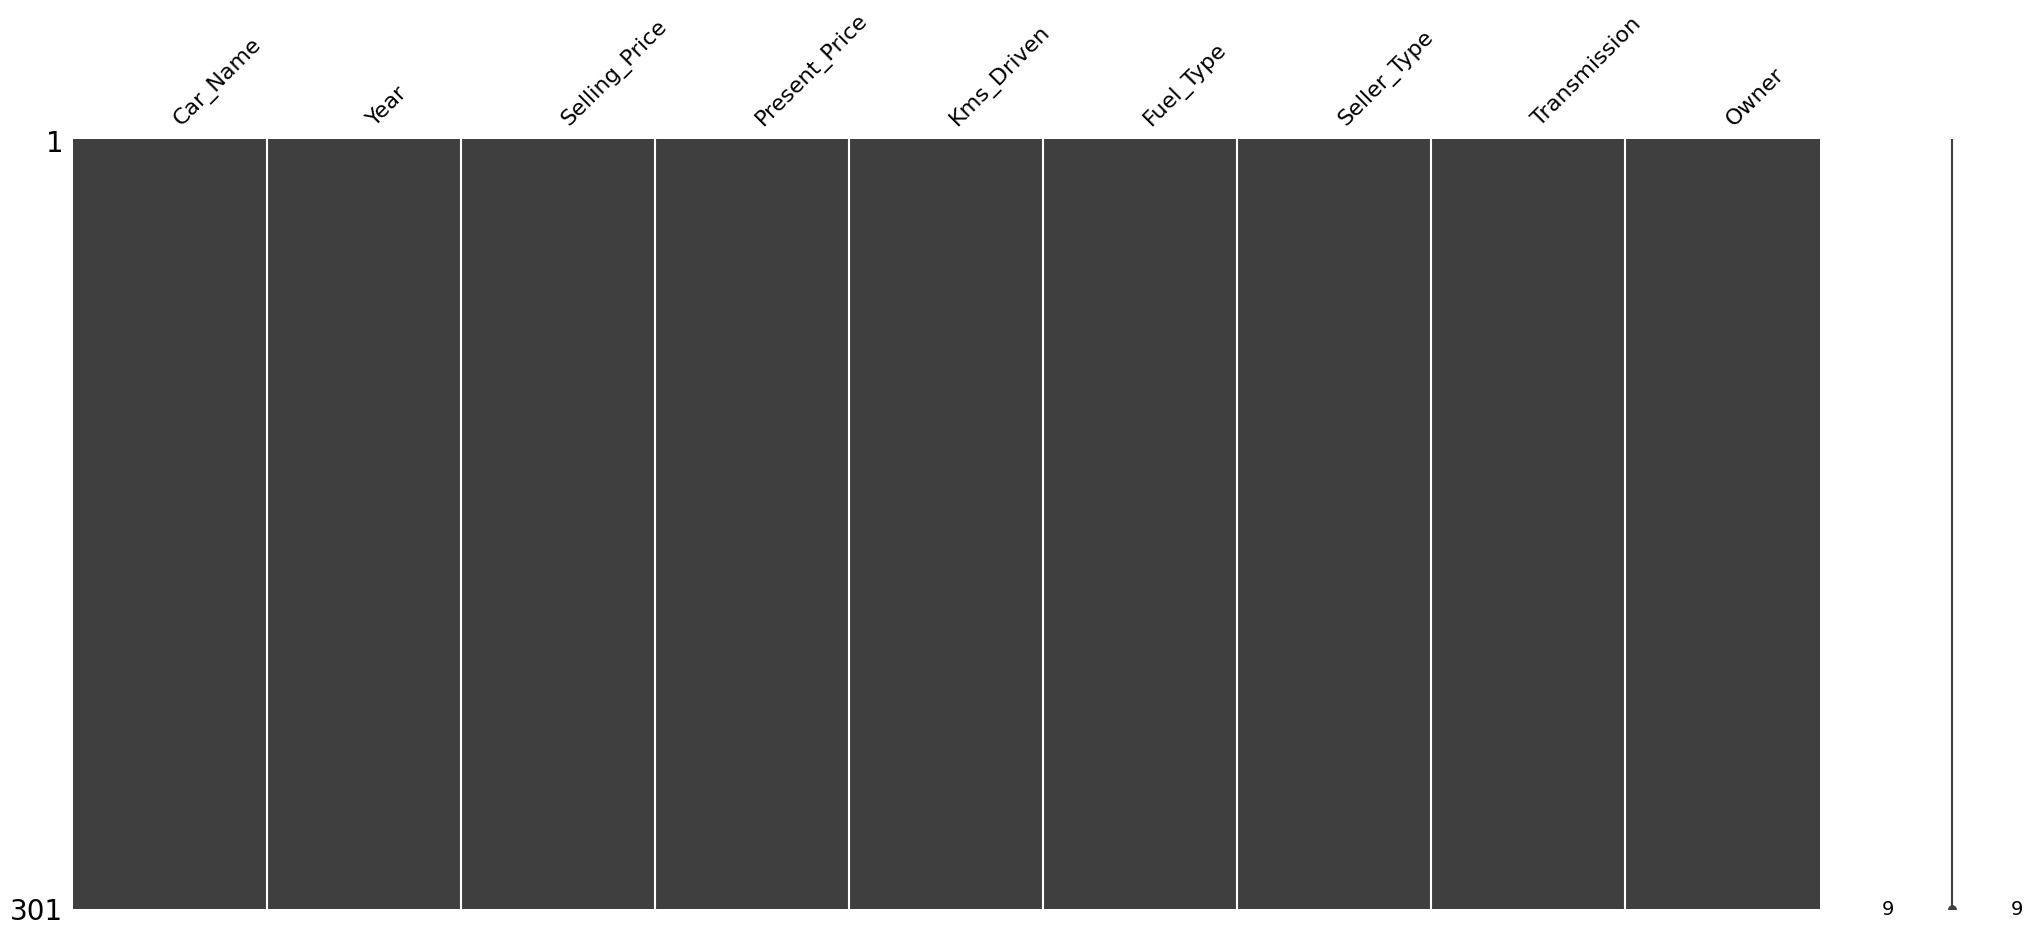

In [33]:
msno.matrix(car_data)

### checking for cont data

In [34]:
cont_data = car_data.select_dtypes(exclude='object')
cont_data.head(7)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
5,2018,9.25,9.83,2071,0
6,2015,6.75,8.12,18796,0


### visualization of cont columns

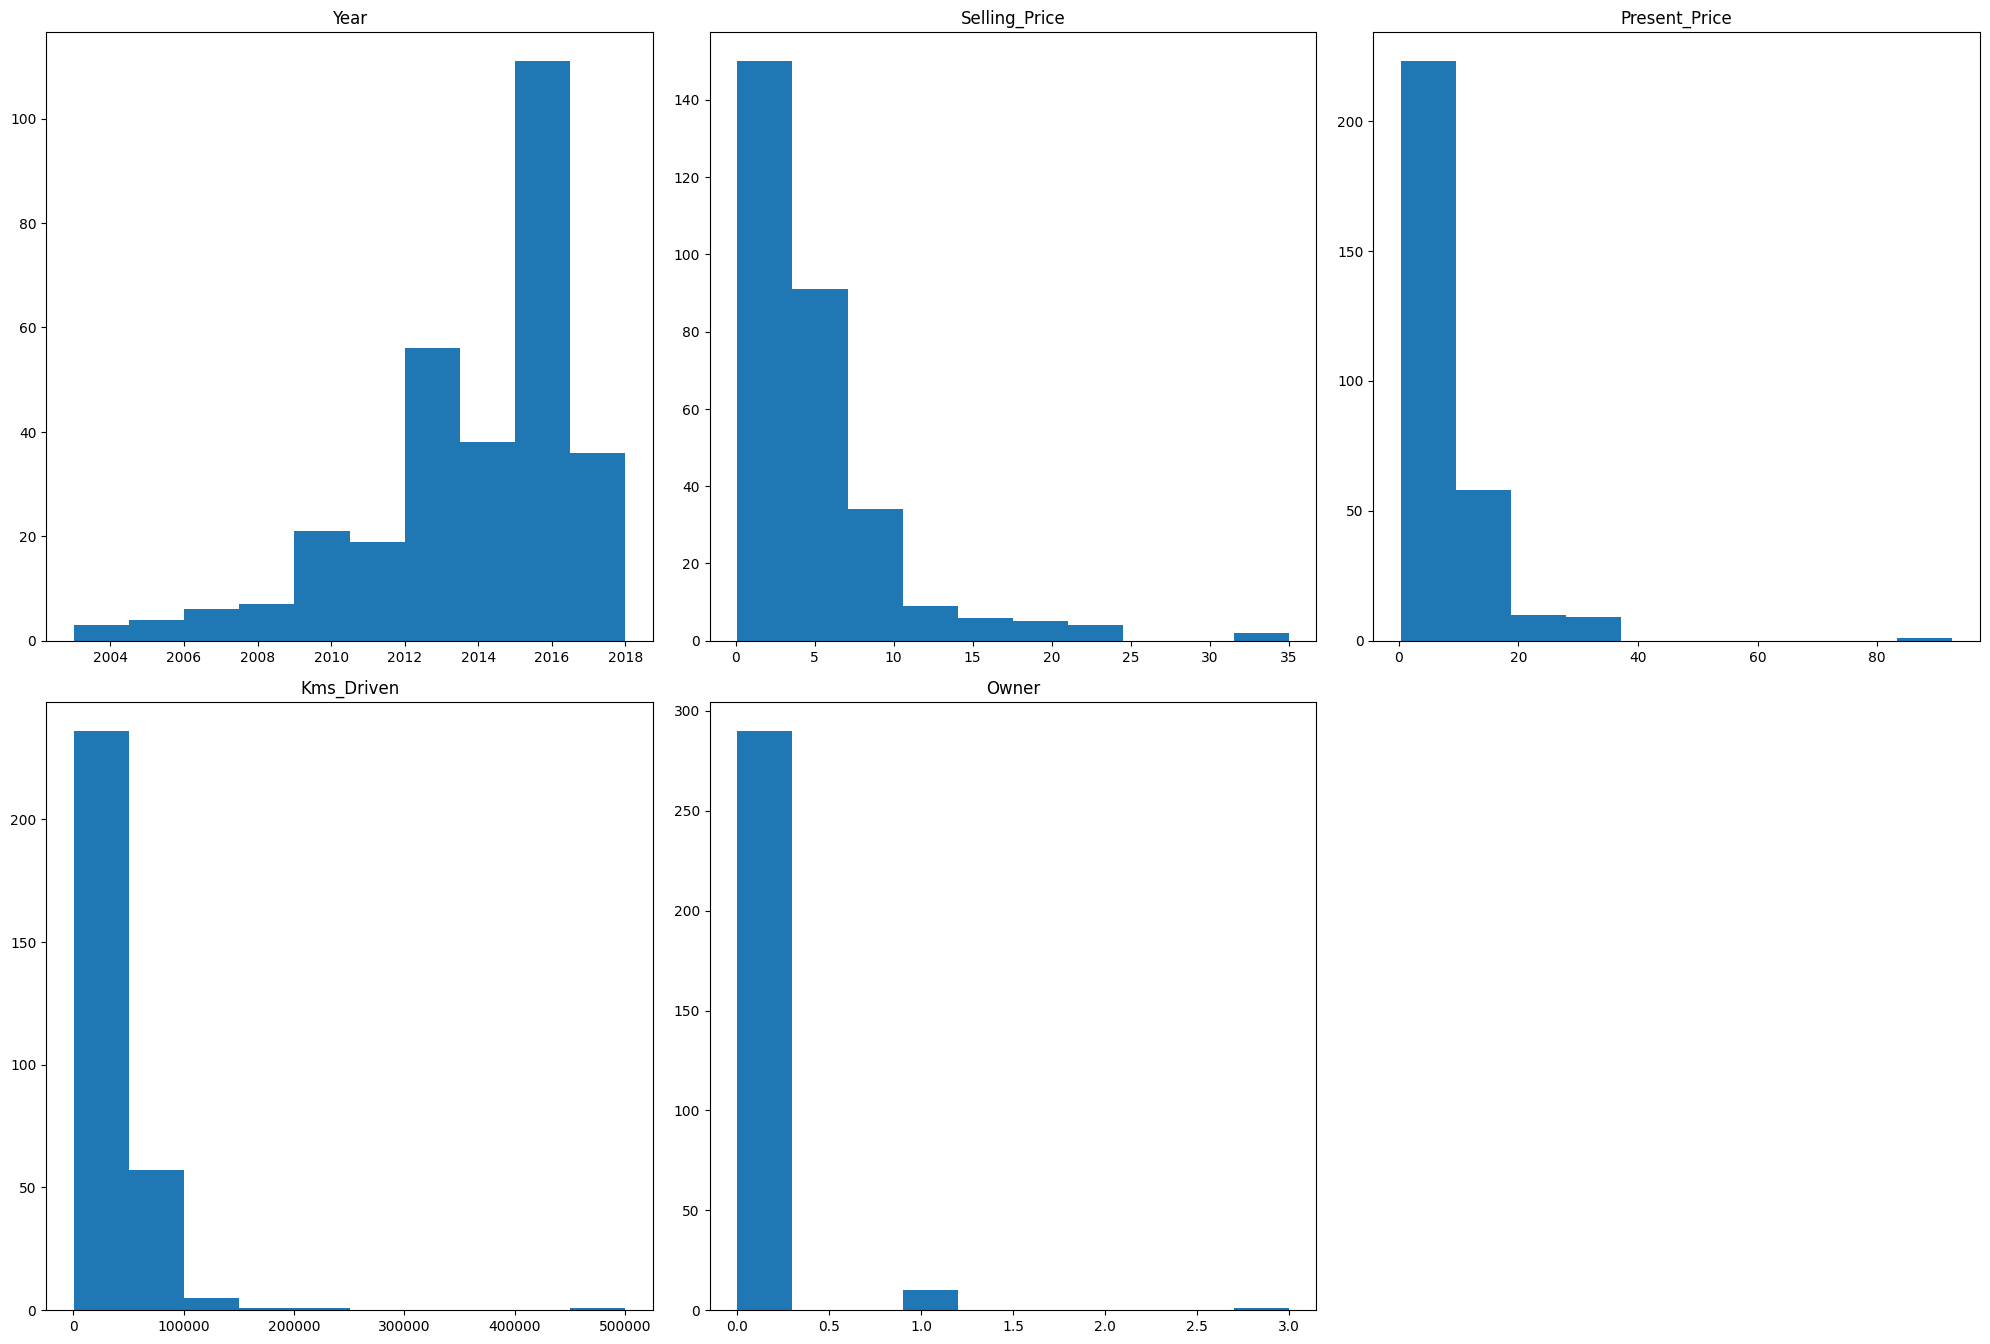

In [35]:
plt.figure(figsize=(20,20))
for i, col in enumerate(cont_data.columns):
    plt.subplot(3,3, i+1)
    plt.hist(car_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Outliers

In [36]:
def boxploting(cont_data):
    plt.figure(figure=(20,20))
    for i,col in enumerate(cont_data.columns):
        plt.subplot(3,3, i+1)
        plt.boxplot(cont_data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

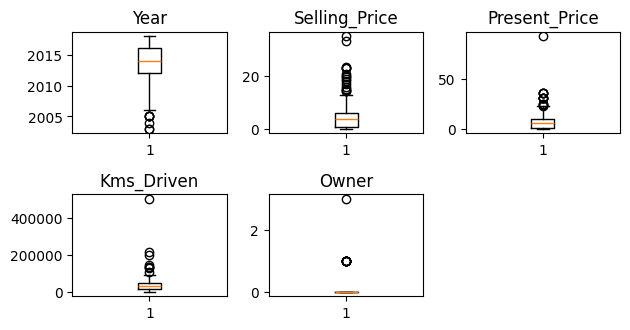

In [37]:
boxploting(cont_data)

### removing outliers

In [38]:
def removing_outliers(columns):
    for i in columns:
        lower_quantile = car_data[i].quantile(.25)
        upper_quantile = car_data[i].quantile(.75)
        
        iqr = upper_quantile - lower_quantile
        
        upper_limit = upper_quantile + 1.5 * iqr
        lower_limit = lower_quantile - 1.5 * iqr
        
        car_data[i] = np.where(car_data[i]>upper_quantile, upper_limit, car_data[i])
        car_data[i] = np.where(car_data[i]<lower_limit, lower_limit, car_data[i])

In [41]:
removing_outliers(cont_data.columns)

In [ ]:
boxploting(cont_data)

In [43]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')